# pip install wordcloud

In [20]:
pip install wordcloud

     ---------------------------------------- 0.0/299.8 kB ? eta -:--:--
     --- ----------------------------------- 30.7/299.8 kB 1.3 MB/s eta 0:00:01
     ------- ------------------------------- 61.4/299.8 kB 1.1 MB/s eta 0:00:01
     ----------- --------------------------- 92.2/299.8 kB 1.1 MB/s eta 0:00:01
     ------------------------- ------------ 204.8/299.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  297.0/299.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 299.8/299.8 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Đọc dữ liệu sau tiền xử lý

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("data/cleaned_final/processed_comments.csv", encoding='utf-8-sig', on_bad_lines='skip')

# Các tham số thống kê của bộ dữ liệu

## Tổng quan 

In [5]:
print("===== TỔNG QUAN BỘ DỮ LIỆU =====")
data.describe()

===== TỔNG QUAN BỘ DỮ LIỆU =====


,Sentence,Emotion,Tokenized_Sentence
count,11380,11380,11380
unique,11380,7,11302
top,cho mình xin bài nhạc tên là gì với ạ,Enjoyment,['dễ thương']
freq,1,3695,10


In [7]:
print("=== SỐ GIÁ TRỊ NULL ===")
print((data.isna()).sum())

=== SỐ GIÁ TRỊ NULL ===
Sentence              0
Emotion               0
Tokenized_Sentence    0
dtype: int64


Nhận xét: 
- Bộ dữ liệu sau tiền xử lý gồm 11380 mẫu, và 7 nhãn cảm xúc
- Trong đó, nhãn Enjoyment chiếm số lượng nhiều nhất 
- Bộ dữ liệu không có các mẫu trùng lặp và giá trị khuyết

## Phân tích chi tiết đặc trưng văn bản

### Độ dài câu

In [21]:
print("====== THAM SỐ THỐNG KÊ CỘT tokens_length =====")
data.describe()

====== THAM SỐ THỐNG KÊ CỘT tokens_length =====


,tokens_length
count,11380.000000
mean,74.806415
std,72.616100
min,5.000000
25%,36.000000
50%,58.000000
75%,91.250000
max,1804.000000


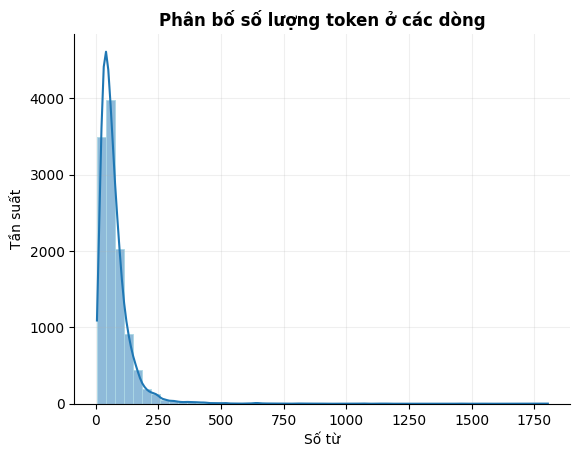

In [22]:
data['tokens_length'] = data['Tokenized_Sentence'].apply(lambda x: len(x))

sns.histplot(data['tokens_length'], bins=50, edgecolor = 'lightblue', kde=True)    # bins: kc cách đều
sns.despine(top=True, right=True)
plt.title("Phân bố số lượng token ở các dòng", fontweight = 'bold')
plt.xlabel("Số từ")
plt.ylabel("Tần suất")
plt.grid(alpha = 0.2)
plt.show()

In [23]:
print("Số lượng mẫu có số token lớn hơn 500:", (data[data['tokens_length'] >= 500]).shape[0])

Số lượng mẫu có số token lớn hơn 500: 41


Nhận xét: Độ dài từ đang có xu hướng lệch phải khá nhiều, có 41 dòng outliner có số lượng token > 500 

--> Dùng IQR để loại bỏ IQR. Trong đó, dữ liệu lệch phải rất nhiều nên chỉ cần dùng giới hạn phải để loại bỏ outliner

### Loại bỏ Outliner 

In [24]:
# Tính Q1, Q3 và IQR
Q1 = data['tokens_length'].quantile(0.25)    
Q3 = data['tokens_length'].quantile(0.75)

IQR = Q3 - Q1

# Tính giới hạn trên, dưới
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f"Ngưỡng dưới: {lower_bound}, ngưỡng trên: {upper_bound}")

Q1 = 36.0, Q3 = 91.25, IQR = 55.25
Ngưỡng dưới: -46.875, ngưỡng trên: 174.125


In [25]:
# Loại bỏ các mẫu có số token > upper_bound
data_filter = data[data['tokens_length'] <= upper_bound]
print("Số lượng dòng loại bỏ sau khi loại bỏ outliner:", data[data['tokens_length'] > upper_bound].shape[0])
print("Kích thước bộ dữ liệu sau khi loại bỏ outliner:", data_filter.shape)

Số lượng dòng loại bỏ sau khi loại bỏ outliner: 600
Kích thước bộ dữ liệu sau khi loại bỏ outliner: (10780, 4)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20412\1184329332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['tokens_length'] = data_filter['Tokenized_Sentence'].apply(lambda x: len(x))


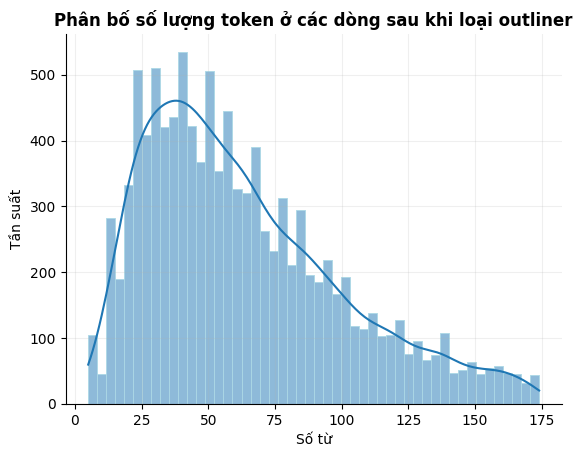

In [26]:
# Vẽ lại phân bố sau loại bỏ 
data_filter['tokens_length'] = data_filter['Tokenized_Sentence'].apply(lambda x: len(x))

sns.histplot(data_filter['tokens_length'], bins=50, edgecolor = 'lightblue', kde=True)    # bins: kc cách đều
sns.despine(top=True, right=True)
plt.title("Phân bố số lượng token ở các dòng sau khi loại outliner", fontweight = 'bold')
plt.xlabel("Số từ")
plt.ylabel("Tần suất")
plt.grid(alpha = 0.2)
plt.show()

Nhận xét: 
- Bộ dữ liệu chủ yếu nằm nhiều xung quanh độ dài token 50 - 100

C:\Users\Admin\AppData\Local\Temp\ipykernel_20412\3426983929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=data_filter, alpha = 0.5, palette='tab10', order = order)


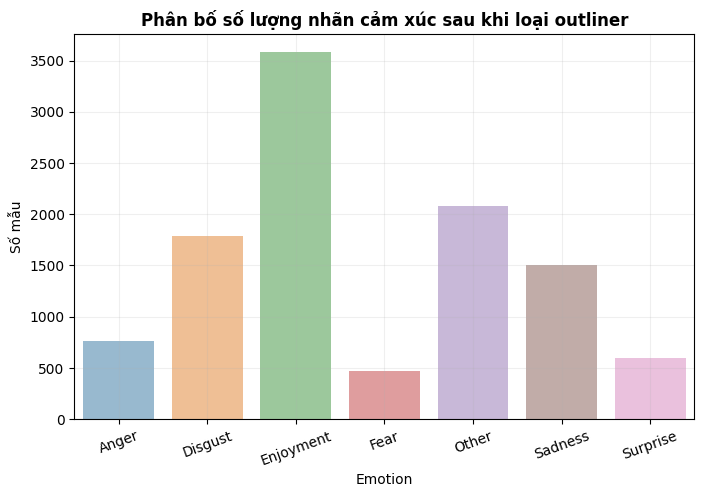

In [27]:
# Danh sách nhãn sắp xếp theo tên 
order = sorted(set(data['Emotion'].unique()).union(set(data['Emotion'].unique())))

plt.figure(figsize=(8,5))
sns.countplot(x='Emotion', data=data_filter, alpha = 0.5, palette='tab10', order = order)
plt.title('Phân bố số lượng nhãn cảm xúc sau khi loại outliner', fontweight='bold')
plt.ylabel('Số mẫu')
plt.xlabel('Emotion')
plt.xticks(rotation=20)
plt.grid(alpha = 0.2)
plt.show()

### Tần suất từ

Ảnh này show ra sau bước tiền xử lý loại từ dừng

In [28]:
data_filter['Tokenized_Sentence']

0              ['mình', 'xin', 'bài', 'nhạc', 'tên', 'gì']
1        ['đáng', 'đời', 'con', 'quỷ', 'về', 'nhà', 'lô...
2        ['lo', 'học', 'yêu', 'đương cười_lớn', 'gì', '...
3        ['ước', 'gì', 'sau này', 'về', 'già', 'vẫn', '...
4        ['mỗi', 'lần', 'video', 'con', 'cứ', 'coi', 'c...
                               ...                        
11374    ['không', 'biết', 'lãi', 'nổi', 'tỷ', 'chưa', ...
11375    ['khả năng', 'ghét', 'làm', 'truy', '7', 'năm'...
11376          ['tiền', 'dân', 'còn', 'nhiều', 'hài_lòng']
11377    ['chỗ', 'tôi', 'hơn', '6', 'tỷ', 'kìa', 'mỉm_c...
11378                          ['bán', 'từ', 'năm', 'nào']
Name: Tokenized_Sentence, Length: 10780, dtype: object

In [29]:
print(data_filter['Tokenized_Sentence'].head(3))

0          ['mình', 'xin', 'bài', 'nhạc', 'tên', 'gì']
1    ['đáng', 'đời', 'con', 'quỷ', 'về', 'nhà', 'lô...
2    ['lo', 'học', 'yêu', 'đương cười_lớn', 'gì', '...
Name: Tokenized_Sentence, dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_20412\3904504713.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['Tokenized_Sentence'] = data_filter['Tokenized_Sentence'].apply(convert_to_list)


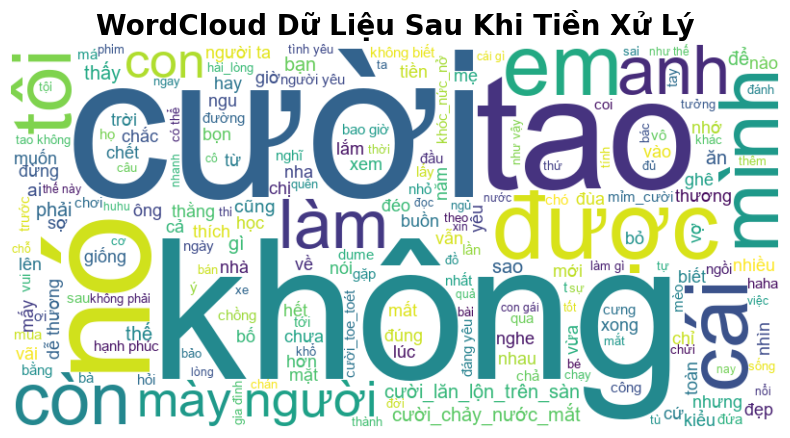

In [30]:
from collections import Counter
from wordcloud import WordCloud
import ast  # Thêm thư viện này để parse string thành list

# Chuyển về dạng string 
def convert_to_list(text):
    if isinstance(text, str):
        try:
            return ast.literal_eval(text)
        except:
            return text.split()
    return text

data_filter['Tokenized_Sentence'] = data_filter['Tokenized_Sentence'].apply(convert_to_list)

# Join lại
all_words = " ".join([" ".join(tokens) if isinstance(tokens, list) else tokens 
                     for tokens in data_filter['Tokenized_Sentence']])

# Tạo WordCloud
wc = WordCloud(font_path='arial',
               background_color='white',
               width=800,
               height=400).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Dữ Liệu Sau Khi Tiền Xử Lý",
          fontsize=20,
          fontweight='bold')
plt.show()

Nhận xét: Do enjoyment và icon nhiều nên chữ cười có tần suất xuất hiện nhiều nhất 

## Phân tích chi tiết cột Emotion

C:\Users\Admin\AppData\Local\Temp\ipykernel_12512\1185852442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=data, alpha = 0.6, palette='tab10', order = order)


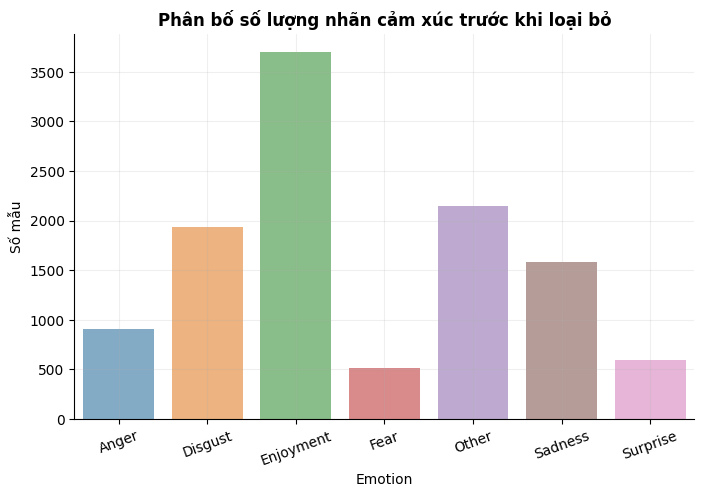

In [282]:
# Danh sách nhãn sắp xếp theo tên 
order = sorted(set(data['Emotion'].unique()).union(set(data['Emotion'].unique())))

# Vẽ biểu đồ 
plt.figure(figsize=(8,5))
sns.countplot(x='Emotion', data=data, alpha = 0.6, palette='tab10', order = order)
sns.despine(top=True, right=True)
plt.title('Phân bố số lượng nhãn cảm xúc trước khi loại bỏ', fontweight='bold')
plt.ylabel('Số mẫu')
plt.xlabel('Emotion')
plt.xticks(rotation=20)
plt.grid(alpha = 0.2)
plt.show()

Nhận xét: tỉ lệ các nhãn không thay đổi quá nhiều sau khi loại bỏ outliner

In [31]:
print("================== BỘ DỮ LIỆU SAU TIỀN XỬ LÝ ==================")
data_filter.head(5)

================== BỘ DỮ LIỆU SAU TIỀN XỬ LÝ ==================


,Sentence,Emotion,Tokenized_Sentence,tokens_length
0,cho mình xin bài nhạc tên là gì với ạ,Other,"[mình, xin, bài, nhạc, tên, gì]",43
1,cho đáng đời con quỷ . về nhà lôi con nhà mày ...,Disgust,"[đáng, đời, con, quỷ, về, nhà, lôi, con, nhà, ...",89
2,lo học đi . yêu đương cười_lớn gì hay lại thíc...,Disgust,"[lo, học, yêu, đương cười_lớn, gì, hay, thích,...",79
3,ước gì sau này về già vẫn có thể như cụ này cười,Enjoyment,"[ước, gì, sau này, về, già, vẫn, có thể, cụ, c...",68
4,mỗi lần có video của con là cứ coi đi coi lại ...,Enjoyment,"[mỗi, lần, video, con, cứ, coi, coi, hoài, cưn...",73


# Chia train - test 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Chia Train_validdation + Test
train_valid_processed_comments, test_processed_comments = train_test_split(
    data_filter, 
    test_size=0.2, 
    random_state=15, 
    stratify=data_filter['Emotion']
    )

In [34]:
print("===== KÍCH THƯỚC BỘ DỮ LIỆU SAU KHI XỬ LÝ =====")
print(f"Train: {train_valid_processed_comments.shape}")
print(f"Test: {test_processed_comments.shape}")

===== KÍCH THƯỚC BỘ DỮ LIỆU SAU KHI XỬ LÝ =====
Train: (8624, 4)
Test: (2156, 4)
